# Pneumatic Component Library

## Setup

### Internals

In [90]:
#= Dependencies =#

using ModelingToolkit, Plots, DifferentialEquations
using OrdinaryDiffEq
using Symbolics
mtk = ModelingToolkit
import ThermalSystem_Models as tsm

┌ Warning: /home/jacksonharvey/.julia/packages/NonlinearSolve/7Y0dI/src/function_wrappers.jl no longer exists, deleted all methods
└ @ Revise /home/jacksonharvey/.julia/packages/Revise/FaTes/src/packagedef.jl:666
┌ Warning: /home/jacksonharvey/.julia/packages/NonlinearSolve/7Y0dI/src/trace.jl no longer exists, deleted all methods
└ @ Revise /home/jacksonharvey/.julia/packages/Revise/FaTes/src/packagedef.jl:666


┌ Warning: /home/jacksonharvey/.julia/packages/NonlinearSolve/7Y0dI/src/extension_algs.jl no longer exists, deleted all methods
└ @ Revise /home/jacksonharvey/.julia/packages/Revise/FaTes/src/packagedef.jl:666
┌ Warning: /home/jacksonharvey/.julia/packages/NonlinearSolve/7Y0dI/src/levenberg.jl no longer exists, deleted all methods
└ @ Revise /home/jacksonharvey/.julia/packages/Revise/FaTes/src/packagedef.jl:666


┌ Warning: /home/jacksonharvey/.julia/packages/NonlinearSolve/7Y0dI/src/klement.jl no longer exists, deleted all methods
└ @ Revise /home/jacksonharvey/.julia/packages/Revise/FaTes/src/packagedef.jl:666
┌ Warning: /home/jacksonharvey/.julia/packages/NonlinearSolve/7Y0dI/src/lbroyden.jl no longer exists, deleted all methods
└ @ Revise /home/jacksonharvey/.julia/packages/Revise/FaTes/src/packagedef.jl:666


┌ Warning: /home/jacksonharvey/.julia/packages/NonlinearSolve/7Y0dI/src/trustRegion.jl no longer exists, deleted all methods
└ @ Revise /home/jacksonharvey/.julia/packages/Revise/FaTes/src/packagedef.jl:666
┌ Warning: /home/jacksonharvey/.julia/packages/NonlinearSolve/7Y0dI/src/gaussnewton.jl no longer exists, deleted all methods
└ @ Revise /home/jacksonharvey/.julia/packages/Revise/FaTes/src/packagedef.jl:666


┌ Warning: /home/jacksonharvey/.julia/packages/NonlinearSolve/7Y0dI/src/pseudotransient.jl no longer exists, deleted all methods
└ @ Revise /home/jacksonharvey/.julia/packages/Revise/FaTes/src/packagedef.jl:666
┌ Warning: /home/jacksonharvey/.julia/packages/NonlinearSolve/7Y0dI/src/jacobian.jl no longer exists, deleted all methods
└ @ Revise /home/jacksonharvey/.julia/packages/Revise/FaTes/src/packagedef.jl:666


┌ Warning: /home/jacksonharvey/.julia/packages/NonlinearSolve/7Y0dI/src/linesearch.jl no longer exists, deleted all methods
└ @ Revise /home/jacksonharvey/.julia/packages/Revise/FaTes/src/packagedef.jl:666
┌ Warning: /home/jacksonharvey/.julia/packages/NonlinearSolve/7Y0dI/src/raphson.jl no longer exists, deleted all methods
└ @ Revise /home/jacksonharvey/.julia/packages/Revise/FaTes/src/packagedef.jl:666


┌ Warning: /home/jacksonharvey/.julia/packages/NonlinearSolve/7Y0dI/src/dfsane.jl no longer exists, deleted all methods
└ @ Revise /home/jacksonharvey/.julia/packages/Revise/FaTes/src/packagedef.jl:666
┌ Warning: /home/jacksonharvey/.julia/packages/NonlinearSolve/7Y0dI/src/broyden.jl no longer exists, deleted all methods
└ @ Revise /home/jacksonharvey/.julia/packages/Revise/FaTes/src/packagedef.jl:666


┌ Warning: /home/jacksonharvey/.julia/packages/NonlinearSolve/7Y0dI/src/ad.jl no longer exists, deleted all methods
└ @ Revise /home/jacksonharvey/.julia/packages/Revise/FaTes/src/packagedef.jl:666
┌ Error: Failed to revise /home/jacksonharvey/.julia/packages/NonlinearSolve/7Y0dI/src/default.jl
│   exception = Revise.ReviseEvalException("/home/jacksonharvey/.julia/dev/ThermalSystem_Models/src/Playground/_240127_/none:0", TypeError(Symbol("Type{...} expression"), "", UnionAll, NonlinearSolve.AbstractNonlinearSolveAlgorithm), Any[(top-level scope at none:0, 1)])
└ @ Revise /home/jacksonharvey/.julia/packages/Revise/FaTes/src/packagedef.jl:722


┌ Error: Failed to revise /home/jacksonharvey/.julia/packages/NonlinearSolve/7Y0dI/src/NonlinearSolve.jl
│   exception = Revise.ReviseEvalException("/home/jacksonharvey/.julia/dev/ThermalSystem_Models/src/Playground/_240127_/none:0", ErrorException("invalid redefinition of constant NonlinearSolve.AbstractNonlinearSolveAlgorithm"), Any[(top-level scope at none:1, 1)])
└ @ Revise /home/jacksonharvey/.julia/packages/Revise/FaTes/src/packagedef.jl:722
┌ Error: Failed to revise /home/jacksonharvey/.julia/packages/NonlinearSolve/7Y0dI/src/utils.jl
│   exception = Revise.ReviseEvalException("/home/jacksonharvey/.julia/packages/NonlinearSolve/7Y0dI/src/utils.jl:49", UndefVarError(:AbstractNonlinearSolveOperator), Any[(top-level scope at utils.jl:49, 1)])
└ @ Revise /home/jacksonharvey/.julia/packages/Revise/FaTes/src/packagedef.jl:722
┌ Warning: The running code does not match the saved version for the following files:
│ 
│   /home/jacksonharvey/.julia/packages/NonlinearSolve/7Y0dI/src/Nonline

In [91]:
#= Ports =#

@variables t
const D = Differential(t)

function thermal_dof(name)
    @variables T(t)=300  [description = "Temperature (K)"]
    @variables ds(t)=0.0 [description = "Entropy Flow Rate = dS/dt W/K"]
    ODESystem(Equation[], t,[T,ds],[]; name = name)
end

function mechanical_dof(name)
    @variables P(t)=101325  [description = "Pressure, (Pa)"]
    @variables dV(t)=0.0    [description = "Volume flow rate, m^3/s, = v*A"]
    ODESystem(Equation[], t,[P,dV],[]; name = name)
end

function shaft_dof(name)
    @variables τ(t) = 0.0 [description = "Shaft torque Nm"]
    @variables ω(t) = 0.0 [description = "angular velocity (rad/s)"]
end

function energy_dof(name)
    @variables dE(t) = 0 [description = "Energy Rate (W)"]
    ODESystem(Equation[], t,[dE],[]; name = name)
end

function signal_dof(name)
    @variables sig(t) = 0   [description = "Signal (unitless)"]
    ODESystem(Equation[], t,[sig],[]; name = name)
end

signal_dof (generic function with 1 method)

### Equation generators

In [92]:
#= Connection, Caps, and Equations=#

function eConnect(pins...)
    eqns = [sum(pin -> pin.dE, pins) ~ 0.0]
end

function thermalConnect(pins...)
    eqs = [
        sum(pin -> pin.ds, pins) ~ 0.0, # Entropy flow rate
    ]
    for pin in pins[2:end]
        push!(eqs, pins[1].T ~ pin.T)   # p_1 = p_2, p_1 = p_3,...
    end
    eqs
end

function flowConnect(pins...)
    eqs = [
        sum(pin -> pin.dV, pins) ~ 0.0, # Entropy flow rate
]
    for pin in pins[2:end]
        push!(eqs, pins[1].P ~ pin.P)   # p_1 = p_2, p_1 = p_3,...
    end
    eqs
end

function flowCap(pins...)
    eqs = [p.dV ~ 0 for p in pins]
end

flowCap (generic function with 1 method)

### Components

In [4]:
#= Pneumatic Component Library=#

# Energy to thermal dof transformer
function e2mech_transformer(name)
    e = energy_dof(:e)  # (+) e.De = energy into the system
    p = mechanical_dof(:p)
    eqs = [e.dE ~ q.P * q.dV]
    compose(ODESystem(eqs, t,[],[]; name = name),e,q)
end

# Energy to shaft power
function e2shaft_tranformer(name)
    e     = energy_dof(:e)  # (+) e.De = energy into the system
    sh = shaft_dof(:shaft)      
    eqs = [e.dE ~ sh.τ * sh.ω]
    compose(ODESystem(eqs, t,[],[]; name = name),e,sh)
end

# constant energy flow source
function ConstantEnergyFlowSource(name; eflow)
    e = energy_dof(:e)
    eqs = [e.dE ~ -eflow]
    compose(ODESystem(eqs,t,[],[]; name = name),e)
end

function FluidGround(name; pressure = 101325)
    p = mechanical_dof(:p)
    eqs = [p.P ~ pressure]
    compose(ODESystem(eqs, t,[],[]; name = name), p)
end

function IsothermalGasRigidVolume(name; Rg = 287.06, 
                                        volume = 10,
                                        temperature = 300)
    # Rg = specific gas constant
    @variables P(t) = 101325                         [description = "Pressure, Pa"]
    @variables m(t) = 101325*volume/Rg/temperature   [description = "Mass of fluid stored in volume (kg)"]
    @parameters V = volume                           [description = "Container volume (m^3)"]
    @parameters T = temperature                      [description = "Temperature"]
    @parameters Rg = Rg                              [description = "Gas constant"]
    
    p = mechanical_dof(:p)
    C = V/(Rg*T)

    eqs = [D(m) ~ C*D(P),
            p.P ~ P,
            D(m) ~ p.dV* p.P/Rg*T]
    compose(ODESystem(eqs, t, [P,m], [V,T,Rg],name = name), p)
end

function IsothermalGasRigidControlVolume(name; Rg = 287.06, 
                                                volume = 10,
                                                temperature = 300)
        # Rg = specific gas constant
        @variables P(t) = 101325                         [description = "Pressure, Pa"]
        @variables m(t) = 101325*volume/Rg/temperature   [description = "Mass of fluid stored in volume (kg)"]
        @parameters V = volume                           [description = "Container volume (m^3)"]
        @parameters T = temperature                      [description = "Temperature"]
        @parameters Rg = Rg                              [description = "Gas constant"]

        p = mechanical_dof(:p)
        n = mechanical_dof(:n)

        C = V/(Rg*T)

        eqs = [p.P ~ P,
                n.P ~ P,
                D(m) ~ p.dV* p.P/Rg/T + n.dV * n.P/Rg/T,
                D(m) ~ C * D(P)]

        compose(ODESystem(eqs, t, [P,m], [V,T,Rg],name = name), p,n)
end



function IsothermalGasRigidControlVolume(name; Rg = 287.06, 
                volume = 10,
                temperature = 300)
# Rg = specific gas constant
@variables P(t) = 101325                         [description = "Pressure, Pa"]
@variables m(t) = 101325*volume/Rg/temperature   [description = "Mass of fluid stored in volume (kg)"]
@parameters V = volume                           [description = "Container volume (m^3)"]
@parameters T = temperature                      [description = "Temperature"]
@parameters Rg = Rg                              [description = "Gas constant"]

p = mechanical_dof(:p)
n = mechanical_dof(:n)

C = V/(Rg*T)

eqs = [p.P ~ P,
n.P ~ P,
D(m) ~ p.dV* p.P/Rg/T + n.dV * n.P/Rg/T,
D(m) ~ C * D(P)]

compose(ODESystem(eqs, t, [P,m], [V,T,Rg],name = name), p,n)
end
function IsothermalGasFlowResistance(name; R = 1.0)
    p = mechanical_dof(:p)
    n = mechanical_dof(:n)
    @parameters R = R
    eqs = [p.dV ~ (p.P - n.P)/R,
           0 ~ p.dV + n.dV]
    compose(ODESystem(eqs, t, [], [R], name = name), p,n)
end



IsothermalGasFlowResistance (generic function with 1 method)

In [ ]:
## Need to have mass initialize at the beginning

## Examples and Demos

#### helpers

In [5]:
#= Conversions and Labeling info =#
pa2k(x) = x./10^3;
v2gpm(x) = x .* 15850.37248375;
ip_name(x) = x.name # inplace name property
ip_str_name(x) = string(x.name)

ip_str_name (generic function with 1 method)

#### Charging Accumulator

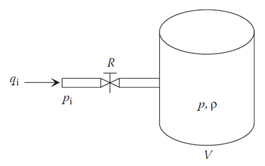

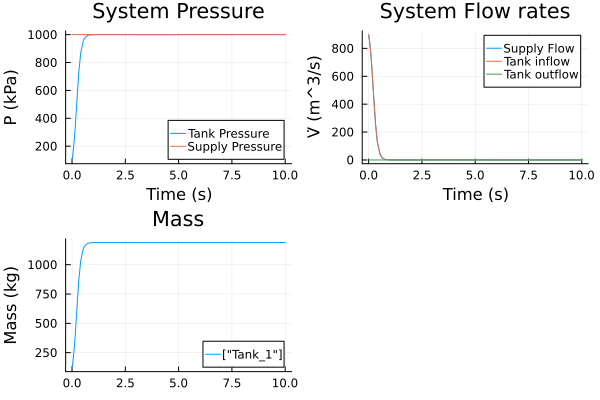

In [6]:
#= Example 1: Charging Tank =#
Tank1 = IsothermalGasRigidControlVolume(:Tank1; temperature = 293, volume = 100)
Rflow = IsothermalGasFlowResistance(:Rflow; R = 1000)

subsys = [Tank1, Rflow]

conn = vcat(flowConnect(Rflow.n, Tank1.p),
                        [Rflow.p.P ~ 1e6],
                        flowCap(Tank1.n))

sysbuild = compose(ODESystem(conn, t, name = :sysbuild), subsys)
                    
sys = structural_simplify(sysbuild)
prob = ODEProblem(sys,[],(0,10))
sol = solve(prob)

pressure_fig = plot(sol.t, [sol[sys.Tank1.p.P] ./ 10^3, sol[sys.Rflow.p.P] ./10^3]; 
                    label=["Tank Pressure" "Supply Pressure"], 
                    title = "System Pressure", 
                    ylabel = "P (kPa)",
                    xlabel = "Time (s)")

vflow_fig = plot(sol.t, [sol[sys.Tank1.p.dV], sol[sys.Rflow.p.dV], sol[sys.Tank1.n.dV]]; 
                    label=["Supply Flow" "Tank inflow" "Tank outflow"], 
                    title = "System Flow rates", 
                    ylabel = "V̇ (m^3/s)",
                    xlabel = "Time (s)")

mplot = plot(sol.t,[(sol[Tank1.m])], label = ["Tank_1"], title = "Mass",
    ylabel = "Mass (kg)")

p = plot(pressure_fig,vflow_fig,mplot)

2 Accumulators

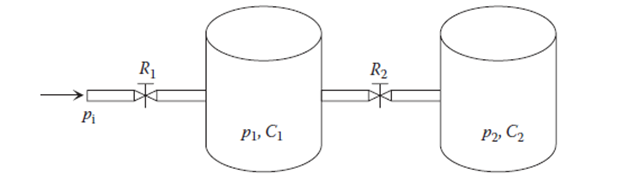

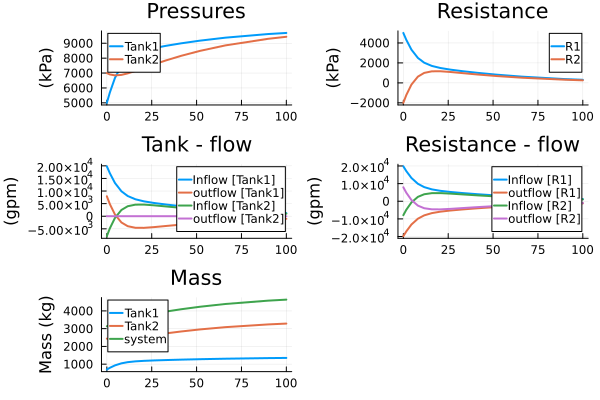

In [8]:
#= Example 2: Charging 2 Tanks =#
Pi = 10e6;

Tank1 = IsothermalGasRigidControlVolume(:Tank1; temperature = 500, volume = 20)

Tank2 = IsothermalGasRigidControlVolume(:Tank2; temperature = 500, volume = 50)

R1 = IsothermalGasFlowResistance(:R1; R = 4e6)

R2 = IsothermalGasFlowResistance(:R2; R = 4e6)

subsys = [Tank1,Tank2, R1,R2]

conn = vcat(R1.p.P ~ Pi,
            flowCap(Tank2.n),
            flowConnect(R1.n, Tank1.p), 
            flowConnect(Tank1.n, R2.p),
            flowConnect(R2.n, Tank2.p))

sysbuild = compose(ODESystem(conn, t, name = :sysbuild), subsys)
   
# initial conditions
u0P = [Tank1.P => 5e6,
        Tank2.P => 7e6]

u0m =  [Tank1.m => u0P[1][2] * Tank1.V/(Tank1.Rg * Tank1.T),
        Tank2.m => u0P[2][2] * Tank2.V/(Tank2.Rg * Tank2.T)]

u0 = vcat(u0P, u0m)

sys = structural_simplify(sysbuild)
prob = ODEProblem(sys,u0,(0,100))
sol = solve(prob)


# plot prelims
tanks = [Tank1, Tank2]; tanklab = ip_str_name.(tanks);
Rvec  = [R1, R2]; Rlab = ip_str_name.(Rvec);

# inflow outflow labs
Rvlabs = repeat(Rlab, inner=2);
Rpre   = repeat(["Inflow ", "outflow "], length(Rlab))
R_flow_labs = reshape(Rpre .* "[" .* Rvlabs .* "]", (1,length(Rvlabs)))

# Tank labels
Tvlabs = repeat(tanklab, inner=2);
tank_pre   = repeat(["Inflow ", "outflow "], length(tanklab))
tank_flow_labs = reshape(tank_pre .* "[" .* Tvlabs .* "]", (1,length(Tvlabs)))


press_plot = plot(sol.t,[pa2k(sol[tnk.P]) for tnk in tanks], 
                            label =  reshape(tanklab,(1,length(tanklab))), 
                            title = "Pressures",
                            ylabel = "(kPa)",
                            linewidth = 2.0)

r_dP_plot = plot(sol.t,[(sol[Rii.p.P] .- sol[Rii.n.P])./10^3 for Rii in Rvec],
                            label =   reshape(Rlab,(1,length(Rlab))),
                            title = "Resistance",
                            ylabel = "(kPa)",
                            linewidth = 2.0)


r_flow_plot = plot(sol.t,[[v2gpm(sol[Rii.p.dV]),v2gpm(sol[Rii.n.dV])] for Rii in Rvec] ,
                        label = R_flow_labs, 
                        title = "Resistance - flow",
                        ylabel = "(gpm)",
                        linewidth = 2.0,)

mplot = plot(sol.t,[[(sol[tnk.m]) for tnk in tanks]...,
                    sum([(sol[tnk.m]) for tnk in tanks])], 
                    label = reshape(vcat(tanklab,"system"),(1,length(tanklab)+1)),
                    title = "Mass",
                    ylabel = "Mass (kg)",
                    linewidth = 2.0)



tank_flow_plot = plot(sol.t,[[v2gpm(sol[Tii.p.dV]),v2gpm(sol[Tii.n.dV])] for Tii in tanks] ,
                    label = tank_flow_labs, 
                    title = "Tank - flow",
                    ylabel = "(gpm)",
                    linewidth = 2.0,)

p=plot(press_plot,r_dP_plot,tank_flow_plot, r_flow_plot,mplot; layout =  (3,2))

3 Accumulators

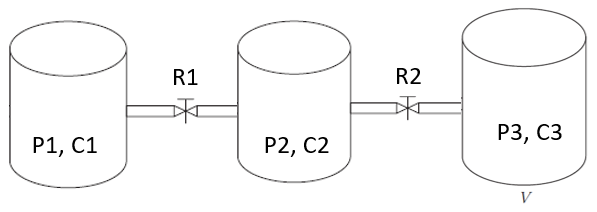

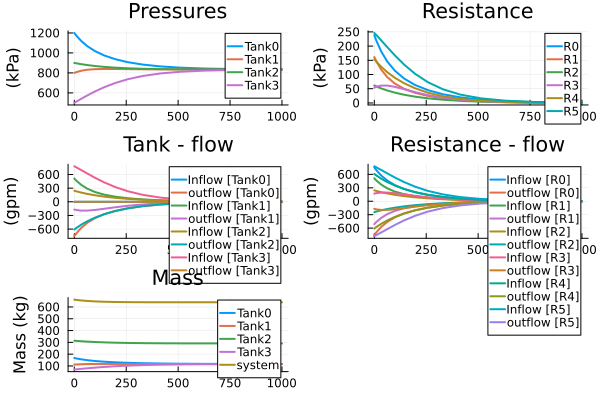

In [10]:
#= 
    3 accumulator setup

                    -- R2 -- Tank2 -- R4 --
    Tank0 -- R0 --<                         > -- R5 -- Tank3
                    -- R1 -- Tank1 -- R3 -- 
=#
Tank0 = IsothermalGasRigidControlVolume(:Tank0; temperature = 500, volume = 20)

Tank1 = IsothermalGasRigidControlVolume(:Tank1; temperature = 500, volume = 20)

Tank2 = IsothermalGasRigidControlVolume(:Tank2; temperature = 500, volume = 50)

Tank3 = IsothermalGasRigidControlVolume(:Tank3; temperature = 500, volume = 20)

R0 = IsothermalGasFlowResistance(:R0; R = 5e6)

R1 = IsothermalGasFlowResistance(:R1; R = 5e6)

R2 = IsothermalGasFlowResistance(:R2; R = 4e6)

R3 = IsothermalGasFlowResistance(:R3; R = 5e6)

R4 = IsothermalGasFlowResistance(:R4; R = 4e6)

R5 = IsothermalGasFlowResistance(:R5; R = 5e6)



subsys = [Tank0,Tank1,Tank2, Tank3, R0, R1,R2,R3,R4,R5]

conn = vcat(flowCap(Tank0.p),
            flowCap(Tank3.n),
            flowConnect(Tank0.n, R0.p),
            flowConnect(R0.n, R1.p, R2.p),
            flowConnect(R1.n, Tank1.p), 
            flowConnect(Tank1.n, R3.p),
            flowConnect(R2.n, Tank2.p), 
            flowConnect(Tank2.n, R4.p), 
            flowConnect(R3.n, R4.n, R5.p),
            flowConnect(R5.n, Tank3.p))

sysbuild = compose(ODESystem(conn, t, name = :sysbuild), subsys)
   

u0P = [Tank0.P => 1.2e6,
        Tank1.P => 0.8e6,
        Tank2.P => 0.9e6,
        Tank3.P => 0.5e6]

u0m =  [Tank0.m => u0P[1][2] * Tank0.V/(Tank0.Rg * Tank0.T),
        Tank1.m => u0P[2][2] * Tank1.V/(Tank1.Rg * Tank1.T),
        Tank2.m => u0P[3][2] * Tank2.V/(Tank2.Rg * Tank2.T),
        Tank3.m => u0P[4][2] * Tank3.V/(Tank3.Rg * Tank3.T)]

u0 = vcat(u0P, u0m)
sys = structural_simplify(sysbuild)
prob = ODEProblem(sys,u0,(0,1000))
sol = solve(prob)

# plot prelims
tanks = [Tank0, Tank1, Tank2, Tank3]; tanklab = ip_str_name.(tanks);
Rvec  = [R0, R1, R2 ,R3, R4, R5];     Rlab = ip_str_name.(Rvec);

# inflow outflow labs
Rvlabs = repeat(Rlab, inner=2);
Rpre   = repeat(["Inflow ", "outflow "], length(Rlab))
R_flow_labs = reshape(Rpre .* "[" .* Rvlabs .* "]", (1,length(Rvlabs)))

# Tank labels
Tvlabs = repeat(tanklab, inner=2);
tank_pre   = repeat(["Inflow ", "outflow "], length(tanklab))
tank_flow_labs = reshape(tank_pre .* "[" .* Tvlabs .* "]", (1,length(Tvlabs)))



press_plot = plot(sol.t,[pa2k(sol[tnk.P]) for tnk in tanks], 
                            label =  reshape(tanklab,(1,length(tanklab))), 
                            title = "Pressures",
                            ylabel = "(kPa)",
                            linewidth = 2.0)

r_dP_plot = plot(sol.t,[(sol[Rii.p.P] .- sol[Rii.n.P])./10^3 for Rii in Rvec],
                            label =   reshape(Rlab,(1,length(Rlab))),
                            title = "Resistance",
                            ylabel = "(kPa)",
                            linewidth = 2.0)


r_flow_plot = plot(sol.t,[[v2gpm(sol[Rii.p.dV]),v2gpm(sol[Rii.n.dV])] for Rii in Rvec] ,
                        label = R_flow_labs, 
                        title = "Resistance - flow",
                        ylabel = "(gpm)",
                        linewidth = 2.0,)

mplot = plot(sol.t,[[(sol[tnk.m]) for tnk in tanks]...,
                    sum([(sol[tnk.m]) for tnk in tanks])], 
                    label = reshape(vcat(tanklab,"system"),(1,length(tanklab)+1)),
                    title = "Mass",
                    ylabel = "Mass (kg)",
                    linewidth = 2.0)


tank_flow_plot = plot(sol.t,[[v2gpm(sol[Tii.p.dV]),v2gpm(sol[Tii.n.dV])] for Tii in tanks] ,
                    label = tank_flow_labs, 
                    title = "Tank - flow",
                    ylabel = "(gpm)",
                    linewidth = 2.0,)

p=plot(press_plot,r_dP_plot,tank_flow_plot, r_flow_plot,mplot; layout =  (3,2))

Transient charging

2 Accumulators

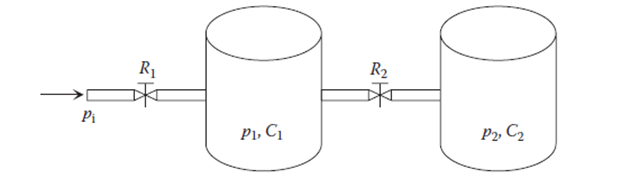

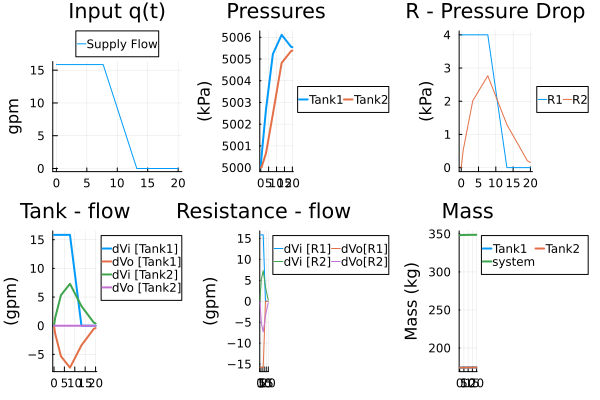

In [89]:
# pressurized from t = 0 to t = 10, the closed

qfun(t) = t < 10 ? .001 : 0
@register_symbolic qfun(t)

Tank1 = IsothermalGasRigidControlVolume(:Tank1; temperature = 500, volume = 5)

Tank2 = IsothermalGasRigidControlVolume(:Tank2; temperature = 500, volume = 5)

R1 = IsothermalGasFlowResistance(:R1; R = 4e6)

R2 = IsothermalGasFlowResistance(:R2; R = 6e6)

subsys = [Tank1,Tank2, R1,R2]

conn = vcat(R1.p.dV ~ qfun(t),
            flowCap(Tank2.n),
            flowConnect(R1.n, Tank1.p), 
            flowConnect(Tank1.n, R2.p),
            flowConnect(R2.n, Tank2.p))

sysbuild = compose(ODESystem(conn, t, name = :sysbuild), subsys)
   
# initial conditions
u0P = [Tank1.P => 5e6,
        Tank2.P => 5e6]

u0m =  [Tank1.m => u0P[1][2] * Tank1.V/(Tank1.Rg * Tank1.T),
        Tank2.m => u0P[2][2] * Tank2.V/(Tank2.Rg * Tank2.T)]

u0 = vcat(u0P, u0m)

sys = structural_simplify(sysbuild)
prob = ODEProblem(sys,u0,(0,20))
sol = solve(prob)


# plot prelims
tanks = [Tank1, Tank2]; tanklab = ip_str_name.(tanks);
Rvec  = [R1, R2]; Rlab = ip_str_name.(Rvec);

# inflow outflow labs
Rvlabs = repeat(Rlab, inner=2);
Rpre   = repeat(["dVi ", "dVo"], length(Rlab))
R_flow_labs = reshape(Rpre .* "[" .* Rvlabs .* "]", (1,length(Rvlabs)))

# Tank labels
Tvlabs = repeat(tanklab, inner=2);
tank_pre   = repeat(["dVi ", "dVo "], length(tanklab))
tank_flow_labs = reshape(tank_pre .* "[" .* Tvlabs .* "]", (1,length(Tvlabs)))


inflow_plot = plot(sol.t, v2gpm(sol[R1.p.dV]), label = "Supply Flow", ylabel = "gpm", title = "Input q(t)", leg = :outertop)

press_plot = plot(sol.t,[pa2k(sol[tnk.P]) for tnk in tanks], 
                            label =  reshape(tanklab,(1,length(tanklab))), 
                            title = "Pressures",
                            ylabel = "(kPa)",
                            linewidth = 2.0,
                            leg = :outerright,
                            legend_column = 2)

r_dP_plot = plot(sol.t,[(sol[Rii.p.P] .- sol[Rii.n.P])./10^3 for Rii in Rvec],
                            label =   reshape(Rlab,(1,length(Rlab))),
                            title = "R - Pressure Drop",
                            ylabel = "(kPa)",
                            linewidth = 1.0,
                            leg = :outerright,
                            legend_column = 2)


r_flow_plot = plot(sol.t,[[v2gpm(sol[Rii.p.dV]),v2gpm(sol[Rii.n.dV])] for Rii in Rvec] ,
                        label = R_flow_labs, 
                        title = "Resistance - flow",
                        ylabel = "(gpm)",
                        linewidth = 1.0,
                        leg = :outertopright,
                        legend_column = 2)

mplot = plot(sol.t,[[(sol[tnk.m]) for tnk in tanks]...,
                    sum([(sol[tnk.m]) for tnk in tanks])], 
                    label = reshape(vcat(tanklab,"system"),(1,length(tanklab)+1)),
                    title = "Mass",
                    ylabel = "Mass (kg)",
                    linewidth = 2.0,
                    legend_column = 2,
                    leg = :outertopright)



tank_flow_plot = plot(sol.t,[[v2gpm(sol[Tii.p.dV]),v2gpm(sol[Tii.n.dV])] for Tii in tanks] ,
                    label = tank_flow_labs, 
                    title = "Tank - flow",
                    ylabel = "(gpm)",
                    linewidth = 2.0,
                    leg = :outertopright,
                    grid = true)
                    # legend_column = 2,
                    # leg = :outerbottom)

plot(inflow_plot,press_plot,r_dP_plot,tank_flow_plot, r_flow_plot, mplot)
# plot(sol.t, sol[R1.p.P] .- sol[Tank1.P])